In [1]:
# 🧱 Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# 📈 Set styles
sns.set(style='whitegrid')


In [2]:
# 📥 Step 2: Load Dataset
# Upload your CSV file or use a path if already in the environment
from google.colab import files
uploaded = files.upload()

df = pd.read_csv("Mall Customer Segmentation Dataset.csv")
df.head()


Saving Mall Customer Segmentation Dataset.csv to Mall Customer Segmentation Dataset (1).csv


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
# 🔍 Step 3: Basic EDA
print("Shape:", df.shape)
print("Missing Values:\n", df.isnull().sum())
df.describe()


Shape: (200, 5)
Missing Values:
 CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


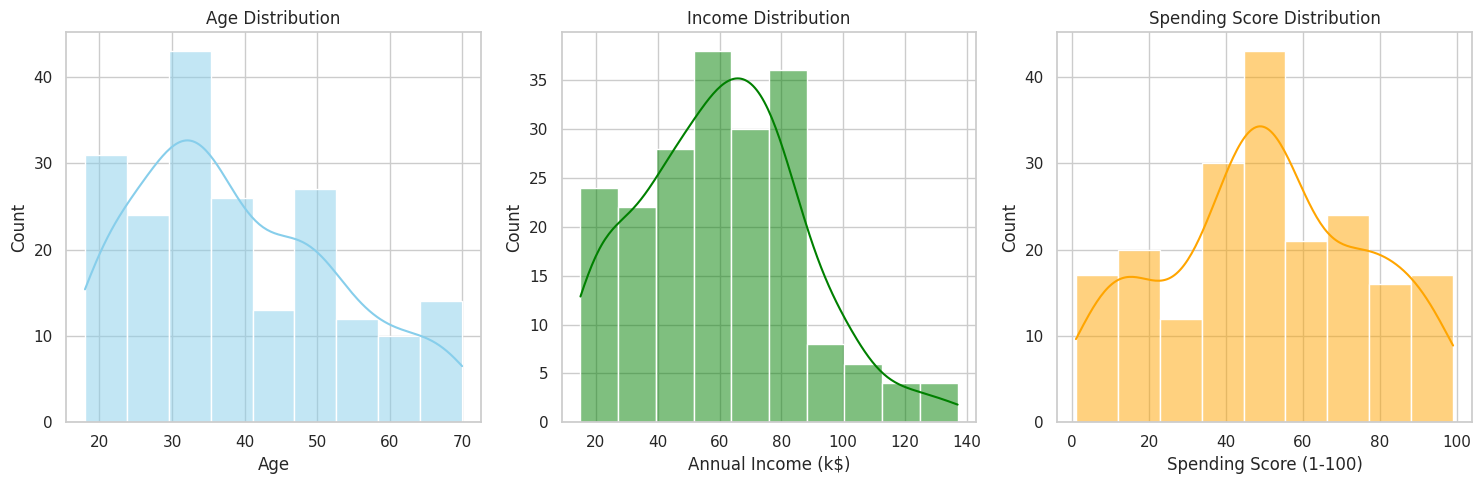

In [4]:
# 📊 Step 4: Visualize Feature Distributions
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.histplot(df['Age'], kde=True, color='skyblue')
plt.title('Age Distribution')

plt.subplot(1,3,2)
sns.histplot(df['Annual Income (k$)'], kde=True, color='green')
plt.title('Income Distribution')

plt.subplot(1,3,3)
sns.histplot(df['Spending Score (1-100)'], kde=True, color='orange')
plt.title('Spending Score Distribution')

plt.tight_layout()
plt.show()


In [5]:
# 🧮 Step 5: Select Features for Clustering
# Typically these 2-3 features are used
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]


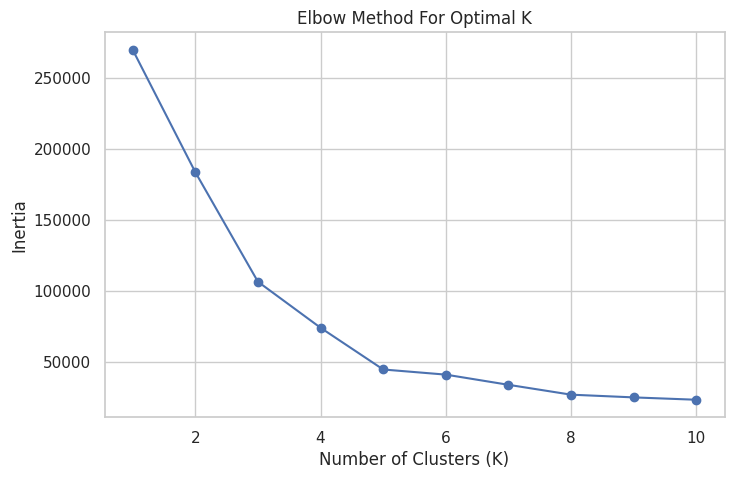

In [6]:
# ⚙️ Step 6: Elbow Method to Find Optimal K for K-Means
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal K')
plt.show()


In [7]:
# 🤖 Step 7: Apply KMeans with Chosen K
k_opt = 5  # Based on elbow curve (change if needed)
kmeans = KMeans(n_clusters=k_opt, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)


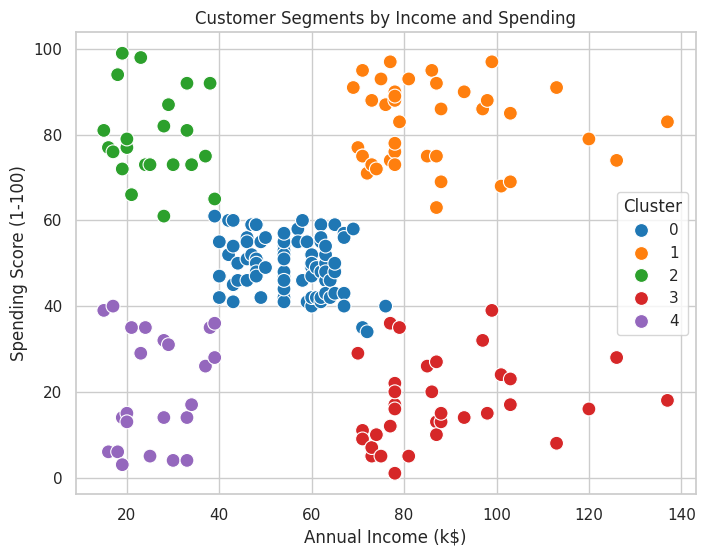

In [8]:
# 📍 Step 8: Visualize Clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)',
                hue='Cluster', palette='tab10', data=df, s=100)
plt.title('Customer Segments by Income and Spending')
plt.show()


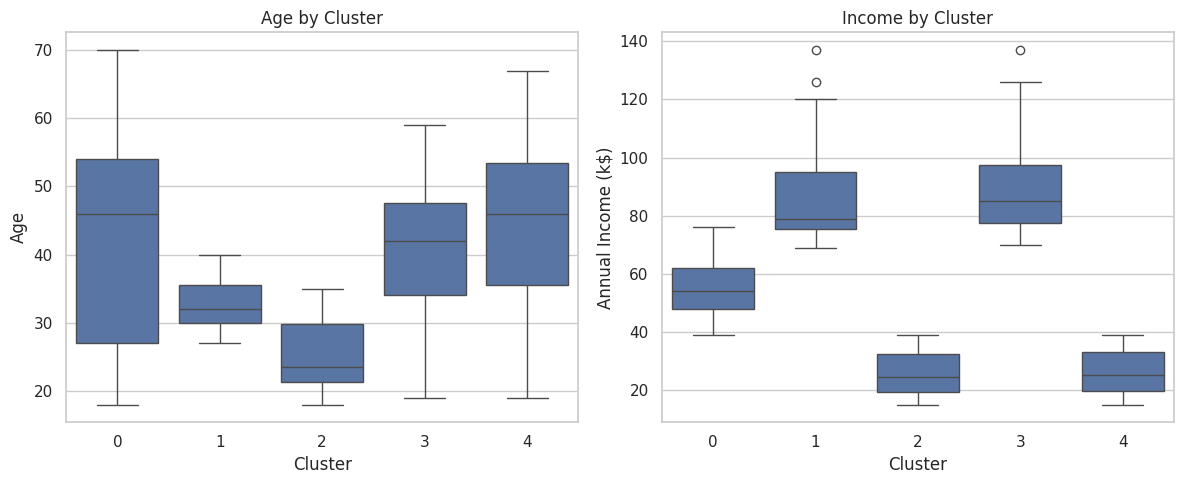

In [9]:
# 📊 Step 9: Boxplots for Cluster Profiles
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.boxplot(x='Cluster', y='Age', data=df)
plt.title('Age by Cluster')

plt.subplot(1,2,2)
sns.boxplot(x='Cluster', y='Annual Income (k$)', data=df)
plt.title('Income by Cluster')

plt.tight_layout()
plt.show()


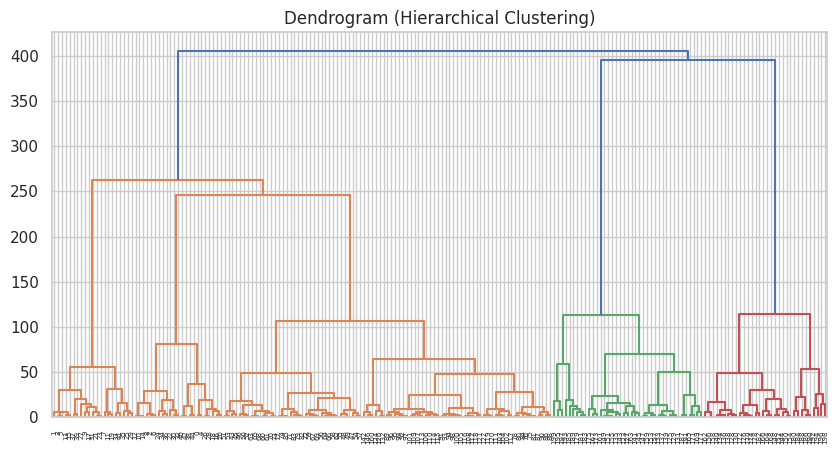

In [10]:
# 🌳 Optional: Hierarchical Clustering (instead of K-Means)
linked = linkage(X, method='ward')
plt.figure(figsize=(10, 5))
dendrogram(linked)
plt.title("Dendrogram (Hierarchical Clustering)")
plt.show()

# Optional: Assign clusters from dendrogram (set t=5 or adjust)
df['H_Cluster'] = fcluster(linked, t=5, criterion='maxclust')


In [11]:
# 📘 Step 10: Interpretation Guide
for cluster_num in range(k_opt):
    print(f"\nCluster {cluster_num} Summary:")
    display(df[df['Cluster'] == cluster_num].describe())



Cluster 0 Summary:


,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Cluster,H_Cluster
count,81.000000,81.000000,81.000000,81.000000,81.0,81.0
mean,86.320988,42.716049,55.296296,49.518519,0.0,3.0
std,24.240889,16.447822,8.988109,6.530909,0.0,0.0
min,44.000000,18.000000,39.000000,34.000000,0.0,3.0
25%,66.000000,27.000000,48.000000,44.000000,0.0,3.0
50%,86.000000,46.000000,54.000000,50.000000,0.0,3.0
75%,106.000000,54.000000,62.000000,55.000000,0.0,3.0
max,143.000000,70.000000,76.000000,61.000000,0.0,3.0



Cluster 1 Summary:


,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Cluster,H_Cluster
count,39.000000,39.000000,39.000000,39.000000,39.0,39.0
mean,162.000000,32.692308,86.538462,82.128205,1.0,4.0
std,22.803509,3.728650,16.312485,9.364489,0.0,0.0
min,124.000000,27.000000,69.000000,63.000000,1.0,4.0
25%,143.000000,30.000000,75.500000,74.500000,1.0,4.0
50%,162.000000,32.000000,79.000000,83.000000,1.0,4.0
75%,181.000000,35.500000,95.000000,90.000000,1.0,4.0
max,200.000000,40.000000,137.000000,97.000000,1.0,4.0



Cluster 2 Summary:


,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Cluster,H_Cluster
count,22.000000,22.000000,22.000000,22.000000,22.0,22.000000
mean,23.090909,25.272727,25.727273,79.363636,2.0,1.090909
std,13.147185,5.257030,7.566731,10.504174,0.0,0.426401
min,2.000000,18.000000,15.000000,61.000000,2.0,1.000000
25%,12.500000,21.250000,19.250000,73.000000,2.0,1.000000
50%,23.000000,23.500000,24.500000,77.000000,2.0,1.000000
75%,33.500000,29.750000,32.250000,85.750000,2.0,1.000000
max,46.000000,35.000000,39.000000,99.000000,2.0,3.000000



Cluster 3 Summary:


,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Cluster,H_Cluster
count,35.000000,35.000000,35.000000,35.000000,35.0,35.000000
mean,164.371429,41.114286,88.200000,17.114286,3.0,4.828571
std,21.457325,11.341676,16.399067,9.952154,0.0,0.568057
min,125.000000,19.000000,70.000000,1.000000,3.0,3.000000
25%,148.000000,34.000000,77.500000,10.000000,3.0,5.000000
50%,165.000000,42.000000,85.000000,16.000000,3.0,5.000000
75%,182.000000,47.500000,97.500000,23.500000,3.0,5.000000
max,199.000000,59.000000,137.000000,39.000000,3.0,5.000000



Cluster 4 Summary:


,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Cluster,H_Cluster
count,23.00000,23.000000,23.000000,23.000000,23.0,23.0
mean,23.00000,45.217391,26.304348,20.913043,4.0,2.0
std,13.56466,13.228607,7.893811,13.017167,0.0,0.0
min,1.00000,19.000000,15.000000,3.000000,4.0,2.0
25%,12.00000,35.500000,19.500000,9.500000,4.0,2.0
50%,23.00000,46.000000,25.000000,17.000000,4.0,2.0
75%,34.00000,53.500000,33.000000,33.500000,4.0,2.0
max,45.00000,67.000000,39.000000,40.000000,4.0,2.0
